In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [4]:
df =pd.read_csv("HR_comma_sep.csv.txt")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
df.shape

(14999, 10)

In [9]:
df = df.drop_duplicates()

In [10]:
df.shape

(11991, 10)

In [11]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [12]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [14]:

labelencoder_salary = LabelEncoder()

df["salary"] = labelencoder_salary.fit_transform(df["salary"])
df

C:\Users\Sindhiya\AppData\Local\Temp\ipykernel_7044\1869411752.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["salary"] = labelencoder_salary.fit_transform(df["salary"])


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,0
11996,0.74,0.95,5,266,10,0,0,1,management,0
11997,0.85,0.54,3,185,10,0,0,1,management,0
11998,0.33,0.65,3,172,10,0,0,1,marketing,0


In [15]:
dummies = pd.get_dummies(df["sales"]).astype(int)
dummies

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
11995,0,0,0,0,1,0,0,0,0,0
11996,0,0,0,0,1,0,0,0,0,0
11997,0,0,0,0,1,0,0,0,0,0
11998,0,0,0,0,0,1,0,0,0,0


In [16]:
merged = pd.concat([df,dummies], axis=1)
merged

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,sales,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,sales,2,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,sales,2,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,sales,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,sales,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,0,0,0,0,0,1,0,0,0,0,0
11996,0.74,0.95,5,266,10,0,0,1,management,0,0,0,0,0,1,0,0,0,0,0
11997,0.85,0.54,3,185,10,0,0,1,management,0,0,0,0,0,1,0,0,0,0,0
11998,0.33,0.65,3,172,10,0,0,1,marketing,0,0,0,0,0,0,1,0,0,0,0


In [19]:
data = merged.drop(['sales', 'management'], axis =1)
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,IT,RandD,accounting,hr,marketing,product_mng,support,technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,0,0
1,0.80,0.86,5,262,6,0,1,0,2,0,0,0,0,0,0,0,0
2,0.11,0.88,7,272,4,0,1,0,2,0,0,0,0,0,0,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,0,0,0,0,0,0,0,0,0
11996,0.74,0.95,5,266,10,0,0,1,0,0,0,0,0,0,0,0,0
11997,0.85,0.54,3,185,10,0,0,1,0,0,0,0,0,0,0,0,0
11998,0.33,0.65,3,172,10,0,0,1,0,0,0,0,0,1,0,0,0


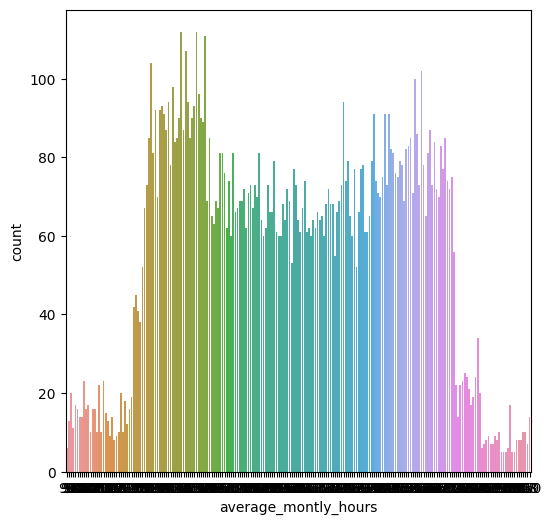

In [26]:
plt.figure(figsize=(6, 6))

sns.countplot(data = df, x = df["average_montly_hours"])
plt.show()


In [23]:

df["number_project"].value_counts()

number_project
4    3685
3    3520
5    2233
2    1582
6     826
7     145
Name: count, dtype: int64

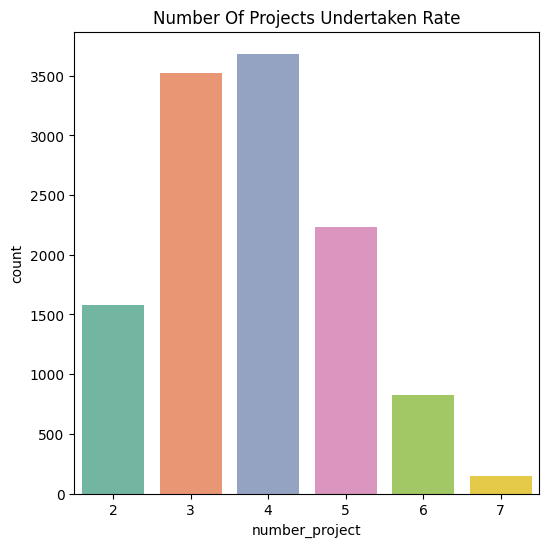

In [25]:
plt.figure(figsize=(6, 6))
sns.countplot(x="number_project", data = df, palette = "Set2")
plt.title("Number Of Projects Undertaken Rate")
plt.show()

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
X = data.drop("left", axis=1)
X
y = data["left"]
y

0        1
1        1
2        1
3        1
4        1
        ..
11995    0
11996    0
11997    0
11998    0
11999    0
Name: left, Length: 11991, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=7)

In [28]:
model = LogisticRegression()
model.fit(X_train,y_train)

C:\Users\Sindhiya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
pred = model.predict(X_test)
pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [30]:
model.score(X_test, y_test)

0.8391666666666666